In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

Loading Dataset

In [2]:
data = pd.read_csv('abalone.csv')

In [3]:
data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [4]:
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


Text(0, 0.5, 'rings')

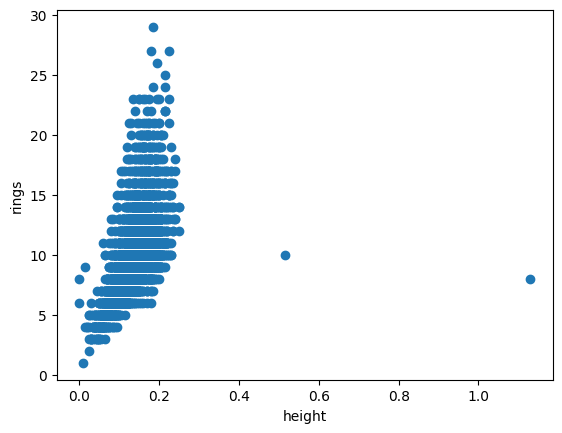

In [8]:
plt.scatter(data.Height,data.Rings)
plt.xlabel('height')
plt.ylabel('rings')

In [9]:
sex = data.iloc[:,0:1]
sex

,Sex
0,M
1,M
2,F
3,M
4,I
...,...
4172,F
4173,M
4174,M
4175,F


In [10]:
lent = data.iloc[:,1:2]
lent

,Length
0,0.455
1,0.350
2,0.530
3,0.440
4,0.330
...,...
4172,0.565
4173,0.590
4174,0.600
4175,0.625


In [11]:
diameter = data.iloc[:,2:3]
diameter

,Diameter
0,0.365
1,0.265
2,0.420
3,0.365
4,0.255
...,...
4172,0.450
4173,0.440
4174,0.475
4175,0.485


In [12]:
height = data.iloc[:,3:4]
height

,Height
0,0.095
1,0.090
2,0.135
3,0.125
4,0.080
...,...
4172,0.165
4173,0.135
4174,0.205
4175,0.150


In [13]:
wholeWeight = data.iloc[:,4:5]
wholeWeight

,Whole weight
0,0.5140
1,0.2255
2,0.6770
3,0.5160
4,0.2050
...,...
4172,0.8870
4173,0.9660
4174,1.1760
4175,1.0945


In [14]:
ShuckedWeight = data.iloc[:,5:6]
ShuckedWeight

,Shucked weight
0,0.2245
1,0.0995
2,0.2565
3,0.2155
4,0.0895
...,...
4172,0.3700
4173,0.4390
4174,0.5255
4175,0.5310


In [15]:
VisceraWeight = data.iloc[:,6:7]
VisceraWeight

,Viscera weight
0,0.1010
1,0.0485
2,0.1415
3,0.1140
4,0.0395
...,...
4172,0.2390
4173,0.2145
4174,0.2875
4175,0.2610


In [16]:
ShellWeight = data.iloc[:,7:8]
ShellWeight

,Shell weight
0,0.1500
1,0.0700
2,0.2100
3,0.1550
4,0.0550
...,...
4172,0.2490
4173,0.2605
4174,0.3080
4175,0.2960


In [17]:
rings = data.iloc[:,8:9]
rings

,Rings
0,15
1,7
2,9
3,10
4,7
...,...
4172,11
4173,10
4174,9
4175,10


univarient analysis

<AxesSubplot: xlabel='Rings', ylabel='Density'>

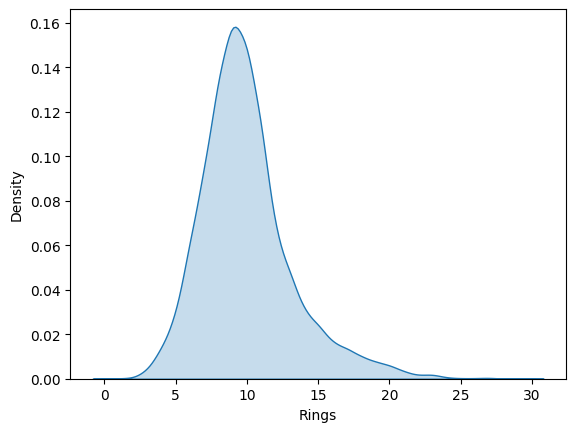

In [18]:
sns.kdeplot(data['Rings'], fill=True)

Bi-Varient analysis

<AxesSubplot: ylabel='Length'>

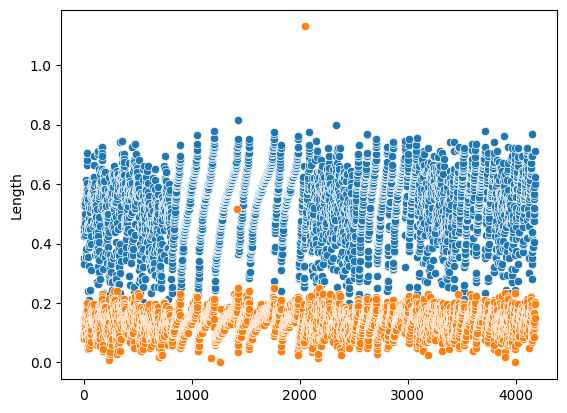

In [19]:
sns.scatterplot(data['Length'])
sns.scatterplot(data["Height"])

Multi-varient analysis

In [20]:
data.describe(include='all')

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
unique,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1528,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,NaN,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,NaN,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,NaN,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,NaN,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,NaN,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000


Descriptive stats

In [66]:
data.describe(include='all')

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,2013.000000,2013.000000,2013.000000,2013.000000,2013.000000,2013.000000,2013.000000,2013.000000,2013.000000
mean,1.056135,0.522755,0.406647,0.138328,0.803753,0.350290,0.176381,0.229623,9.934923
std,0.823565,0.112358,0.093170,0.035773,0.442891,0.203464,0.101117,0.120705,3.057799
min,0.000000,0.200000,0.130000,0.030000,0.035000,0.011500,0.005000,0.010000,3.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441000,0.181500,0.093500,0.130000,9.000000
50%,1.000000,0.540000,0.420000,0.140000,0.792000,0.334000,0.168500,0.235000,9.000000
75%,2.000000,0.610000,0.475000,0.165000,1.133000,0.491500,0.247000,0.318500,11.000000
max,2.000000,0.750000,0.590000,0.230000,1.933000,0.981500,0.492000,0.500000,29.000000


missing values

In [30]:
data.dropna()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [31]:
data = data[(data['Length'] <= 0.8 ) & (data['Length'] >= 0.2)& (data['Rings'])]

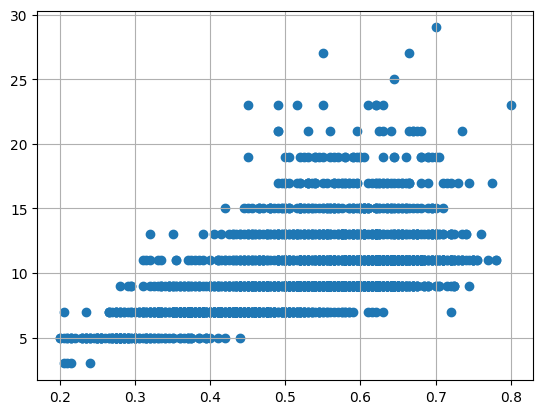

In [32]:
plt.scatter(x = data['Length'], y = data['Rings'])
plt.grid(True)

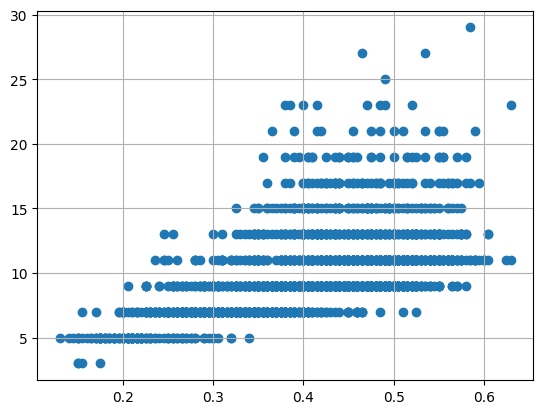

In [33]:
plt.scatter(x = data['Diameter'], y = data['Rings'])
plt.grid(True)

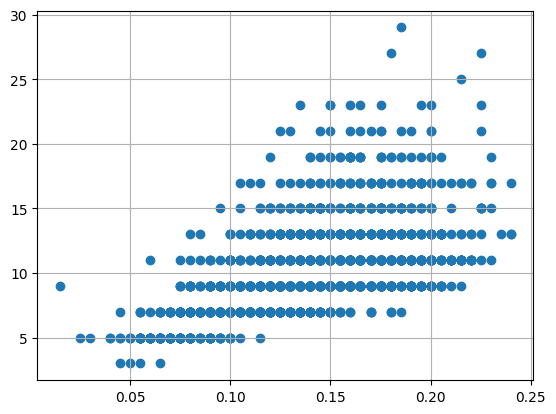

In [34]:
plt.scatter(x = data['Height'], y = data['Rings'])
plt.grid(True)

In [36]:
data = data[(data['Height'] >= 0.03) & (data['Height'] <= 0.3)]

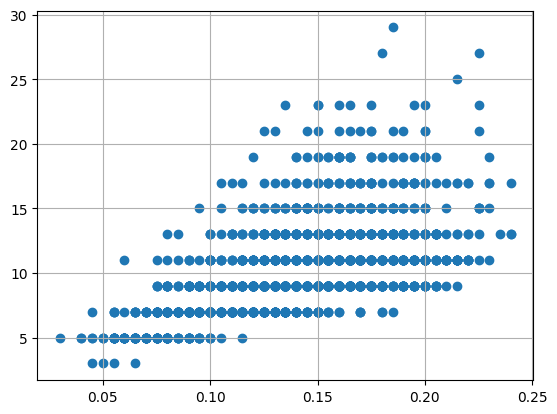

In [37]:
plt.scatter(x = data['Height'], y = data['Rings'])
plt.grid(True)

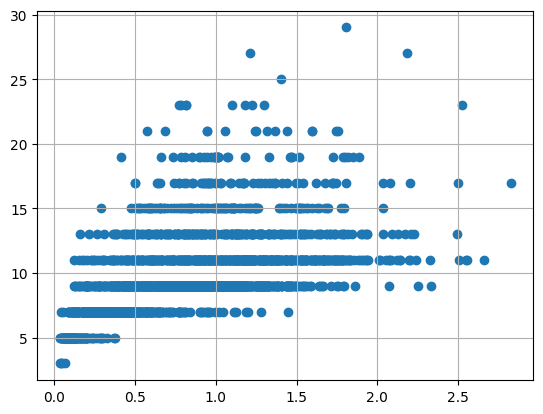

In [38]:
plt.scatter(x = data['Whole weight'], y = data['Rings'])
plt.grid(True)

In [39]:
data = data [(data['Whole weight'] <= 2.5 )]

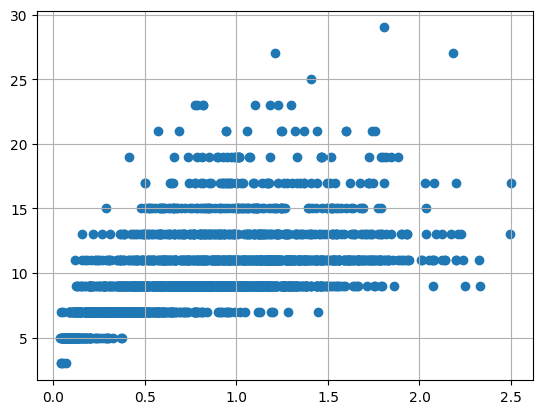

In [40]:
plt.scatter(x = data['Whole weight'], y = data['Rings'])
plt.grid(True)

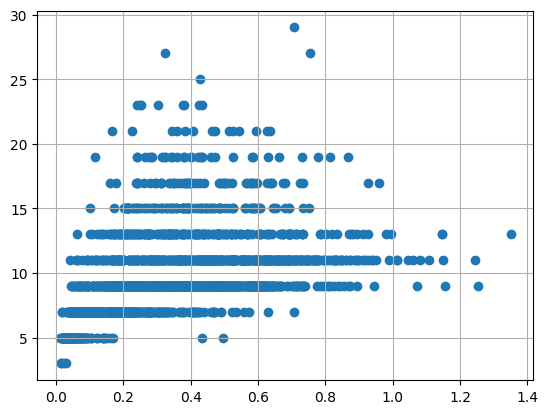

In [41]:
plt.scatter(x = data['Shucked weight'], y = data['Rings'])
plt.grid(True)

In [42]:
data = data [(data['Shucked weight'] <=1)]

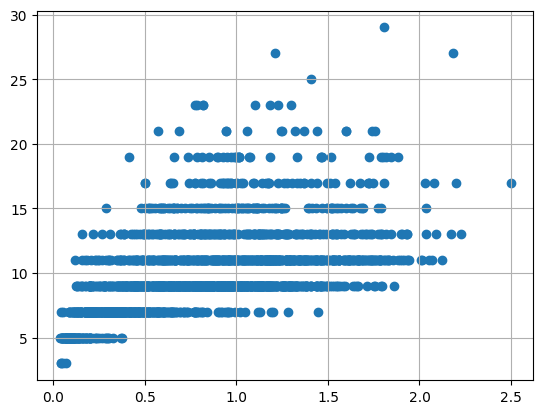

In [43]:
plt.scatter(x = data['Whole weight'], y = data['Rings'])
plt.grid(True)

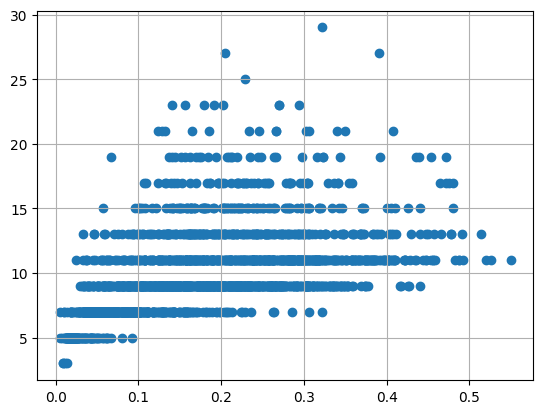

In [44]:
plt.scatter(x = data['Viscera weight'], y = data['Rings'])
plt.grid(True)

In [45]:
data = data [(data['Viscera weight'] <=0.5)]

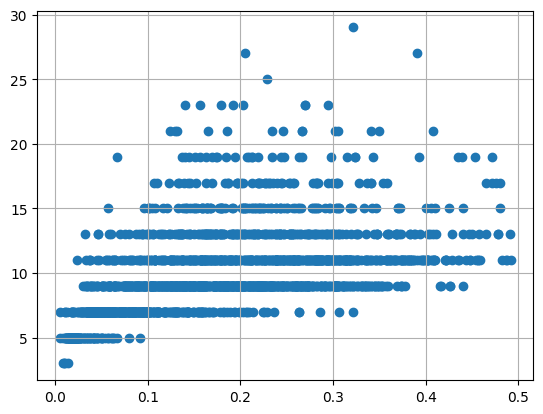

In [46]:
plt.scatter(x = data['Viscera weight'], y = data['Rings'])
plt.grid(True)

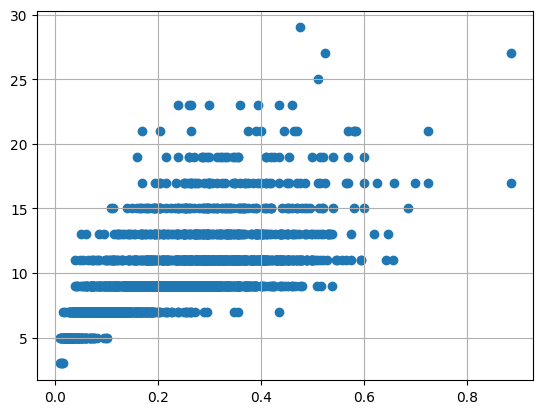

In [47]:
plt.scatter(x = data['Shell weight'], y = data['Rings'])
plt.grid(True)

In [48]:
data = data [(data['Shell weight'] <=0.5)]

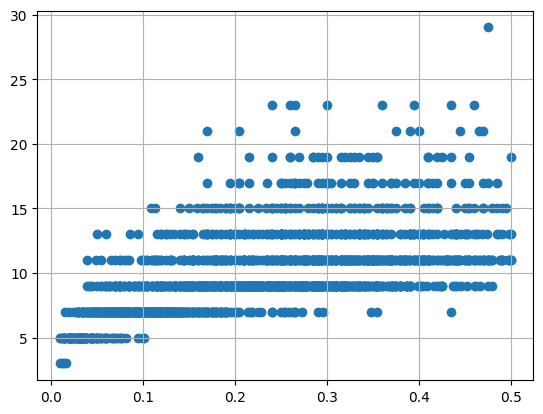

In [49]:
plt.scatter(x = data['Shell weight'], y = data['Rings'])
plt.grid(True)

Encoding

In [50]:
label_encoder = preprocessing.LabelEncoder()
data['Sex'] = label_encoder.fit_transform(data['Sex'])
data['Sex'].unique()

array([2, 0, 1])

In [51]:
data.dtypes

Sex                 int32
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

Splitting

In [54]:
x = data
y = data['Rings'] + 1.5
x


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
8,2,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.1650,9
...,...,...,...,...,...,...,...,...,...
4164,1,0.390,0.290,0.100,0.2845,0.1255,0.0635,0.0810,7
4165,1,0.405,0.300,0.085,0.3035,0.1500,0.0505,0.0880,7
4167,2,0.500,0.380,0.125,0.5770,0.2690,0.1265,0.1535,9
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11


In [55]:
y


0       16.5
1        8.5
2       10.5
4        8.5
8       10.5
        ... 
4164     8.5
4165     8.5
4167    10.5
4172    12.5
4174    10.5
Name: Rings, Length: 2013, dtype: float64

Building model (train & testing)

In [58]:
standardScale = StandardScaler()
x = standardScale.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.25)

In [62]:
regressor = RandomForestRegressor(n_estimators= 500, random_state=0)

In [64]:
regressor.fit(x_train, y_train)
regressor.score(x_train, y_train)*100

99.95402799307415

In [65]:
regressor.fit(x_test, y_test)
regressor.score(x_test, y_test)*100

99.970912084474